#Importing Libraries
Importing necessary libraries for the project

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

#Data Exploration
Reading the dataset. Printing its head, shape, info, null values and duplicates. Also describing the dataset.

In [42]:
df = pd.read_csv('Movie Data.csv')
df.head()
display(df.describe(include='all'))
print(df.isnull().sum())
print('Duplicates:', df.duplicated().sum())
df.drop_duplicates(inplace=True)

,S.no,Movie Title,Genre,Budget (Cr),Director Success Rate,Lead Actor Success Rate,IMDb,Trailer Views (M),Box Office Revenue
count,560.000000,560,560,560.000000,560.000000,560.000000,560.000000,560,560
unique,NaN,560,5,NaN,NaN,NaN,NaN,271,310
top,NaN,Malleswari,Romance,NaN,NaN,NaN,NaN,10,20
freq,NaN,1,145,NaN,NaN,NaN,NaN,19,23
mean,280.500000,NaN,NaN,44.572719,62.578125,58.680875,6.522500,NaN,NaN
std,161.802349,NaN,NaN,78.269540,25.148230,19.523043,2.060427,NaN,NaN
min,1.000000,NaN,NaN,0.002500,0.000000,0.000000,2.200000,NaN,NaN
25%,140.750000,NaN,NaN,7.000000,50.000000,45.450000,5.600000,NaN,NaN
50%,280.500000,NaN,NaN,20.000000,62.500000,60.000000,6.500000,NaN,NaN
75%,420.250000,NaN,NaN,50.000000,80.000000,72.707500,7.500000,NaN,NaN


S.no                       0
Movie Title                0
Genre                      0
Budget (Cr)                0
Director Success Rate      0
Lead Actor Success Rate    0
IMDb                       0
Trailer Views (M)          0
Box Office Revenue         0
dtype: int64
Duplicates: 0



After checking for missing data using df.isnull().sum(), no missing values were found in any of the columns. This indicates that the dataset is complete and doesn't require imputation or deletion of rows for handling missing data.

I checked for duplicate rows using df.duplicated().sum() and found 0 duplicate rows. Thus, no rows were removed from the dataset in this step.

#Encoding Categorical Data

In [43]:

df['Trailer Views (M)'] = pd.to_numeric(df['Trailer Views (M)'], errors='coerce')
df['Box Office Revenue'] = pd.to_numeric(df['Box Office Revenue'], errors='coerce')
df.dropna(subset=['Trailer Views (M)', 'Box Office Revenue'], inplace=True)
df.info()


df_encoded = pd.get_dummies(df.drop(['S.no','Movie Title'], axis=1), drop_first=True)
df_encoded.head()

<class 'pandas.core.frame.DataFrame'>
Index: 557 entries, 0 to 559
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   S.no                     557 non-null    int64  
 1   Movie Title              557 non-null    object 
 2   Genre                    557 non-null    object 
 3   Budget (Cr)              557 non-null    float64
 4   Director Success Rate    557 non-null    float64
 5   Lead Actor Success Rate  557 non-null    float64
 6   IMDb                     557 non-null    float64
 7   Trailer Views (M)        557 non-null    float64
 8   Box Office Revenue       557 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 43.5+ KB


,Budget (Cr),Director Success Rate,Lead Actor Success Rate,IMDb,Trailer Views (M),Box Office Revenue,Genre_Comedy,Genre_Drama,Genre_Romance,Genre_Thriller
0,20.0,71.42,51.72,5.8,9.500,7.72,False,False,True,False
1,4.0,66.60,65.00,7.6,0.970,15.00,False,False,True,False
2,1.5,0.00,23.00,5.3,0.221,21.50,False,False,True,False
3,12.0,66.60,22.22,6.1,3.700,4.45,False,False,True,False
4,15.0,75.00,55.00,4.7,3.500,0.70,False,False,True,False


In this step, I first selected and printed the categorical columns then I used one hot encoder to encode them. One-Hot Encoding is a method to convert categorical data into numerical form by creating new columns one for each unique category filled with 0s and 1s.

#Data Visualization


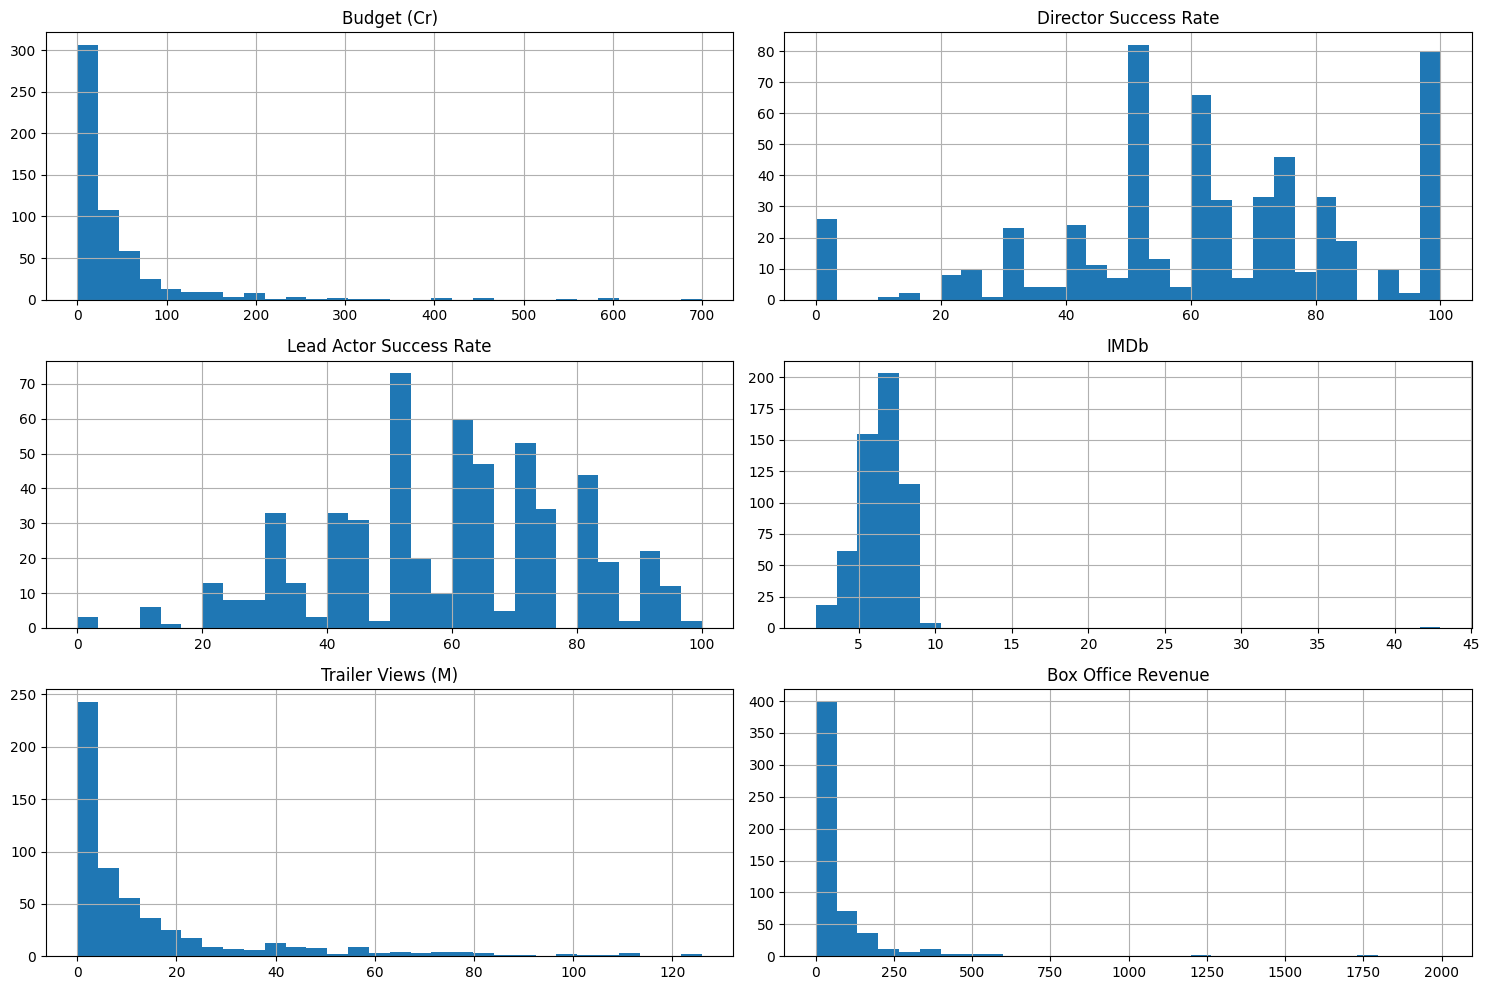

In [44]:

df_encoded.hist(bins=30, figsize=(15,10))
plt.tight_layout()
plt.show()

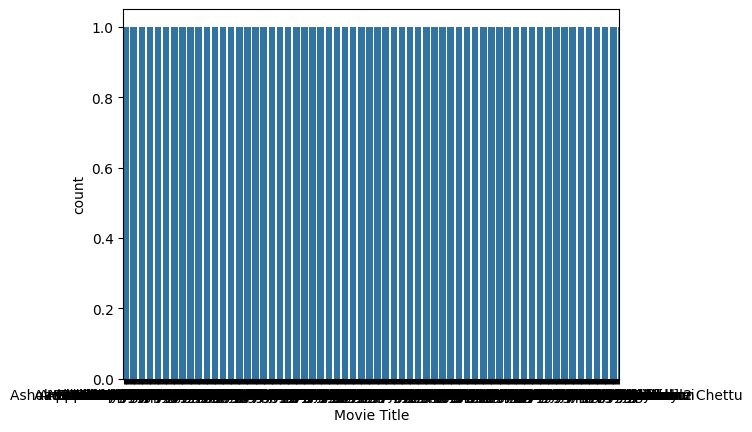

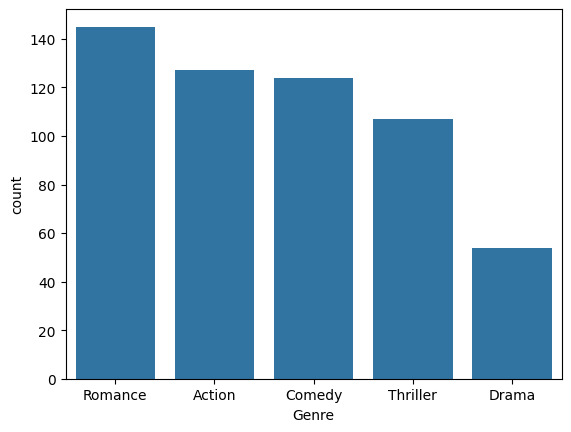

In [45]:

for col in df.select_dtypes(include='object').columns:
    sns.countplot(data=df, x=col)
    plt.show()

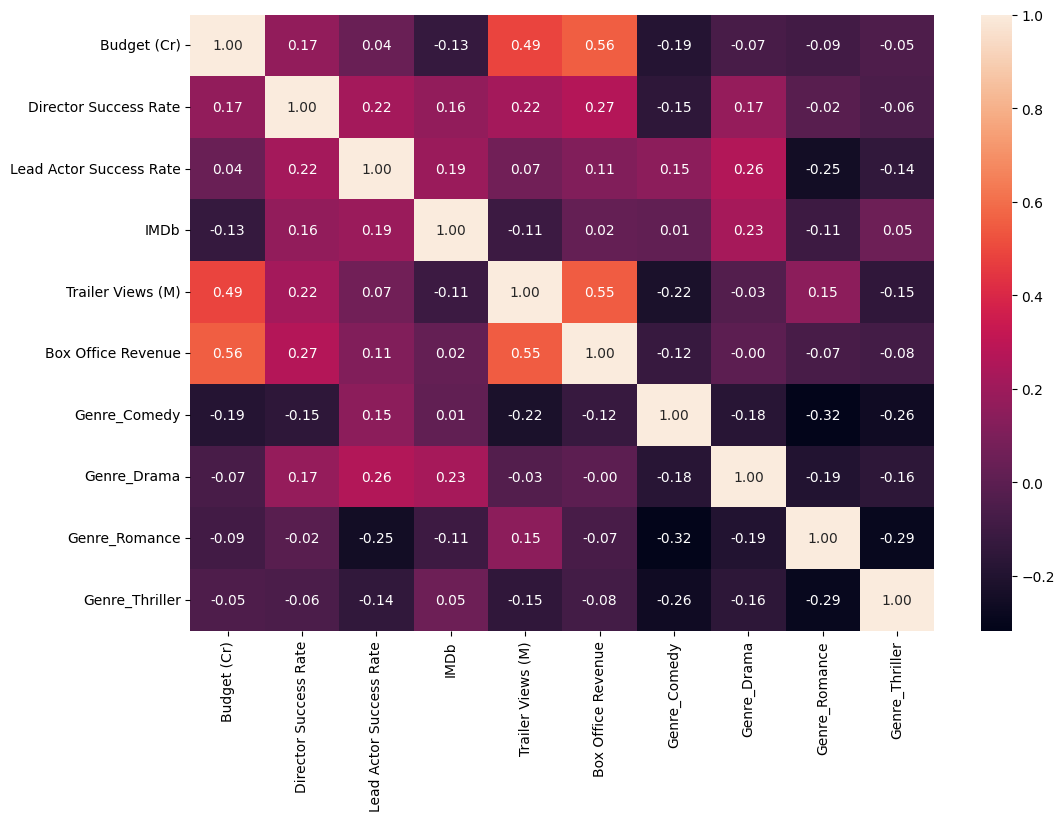

In [46]:

plt.figure(figsize=(12,8))
sns.heatmap(df_encoded.corr(), annot=True, fmt='.2f')
plt.show()

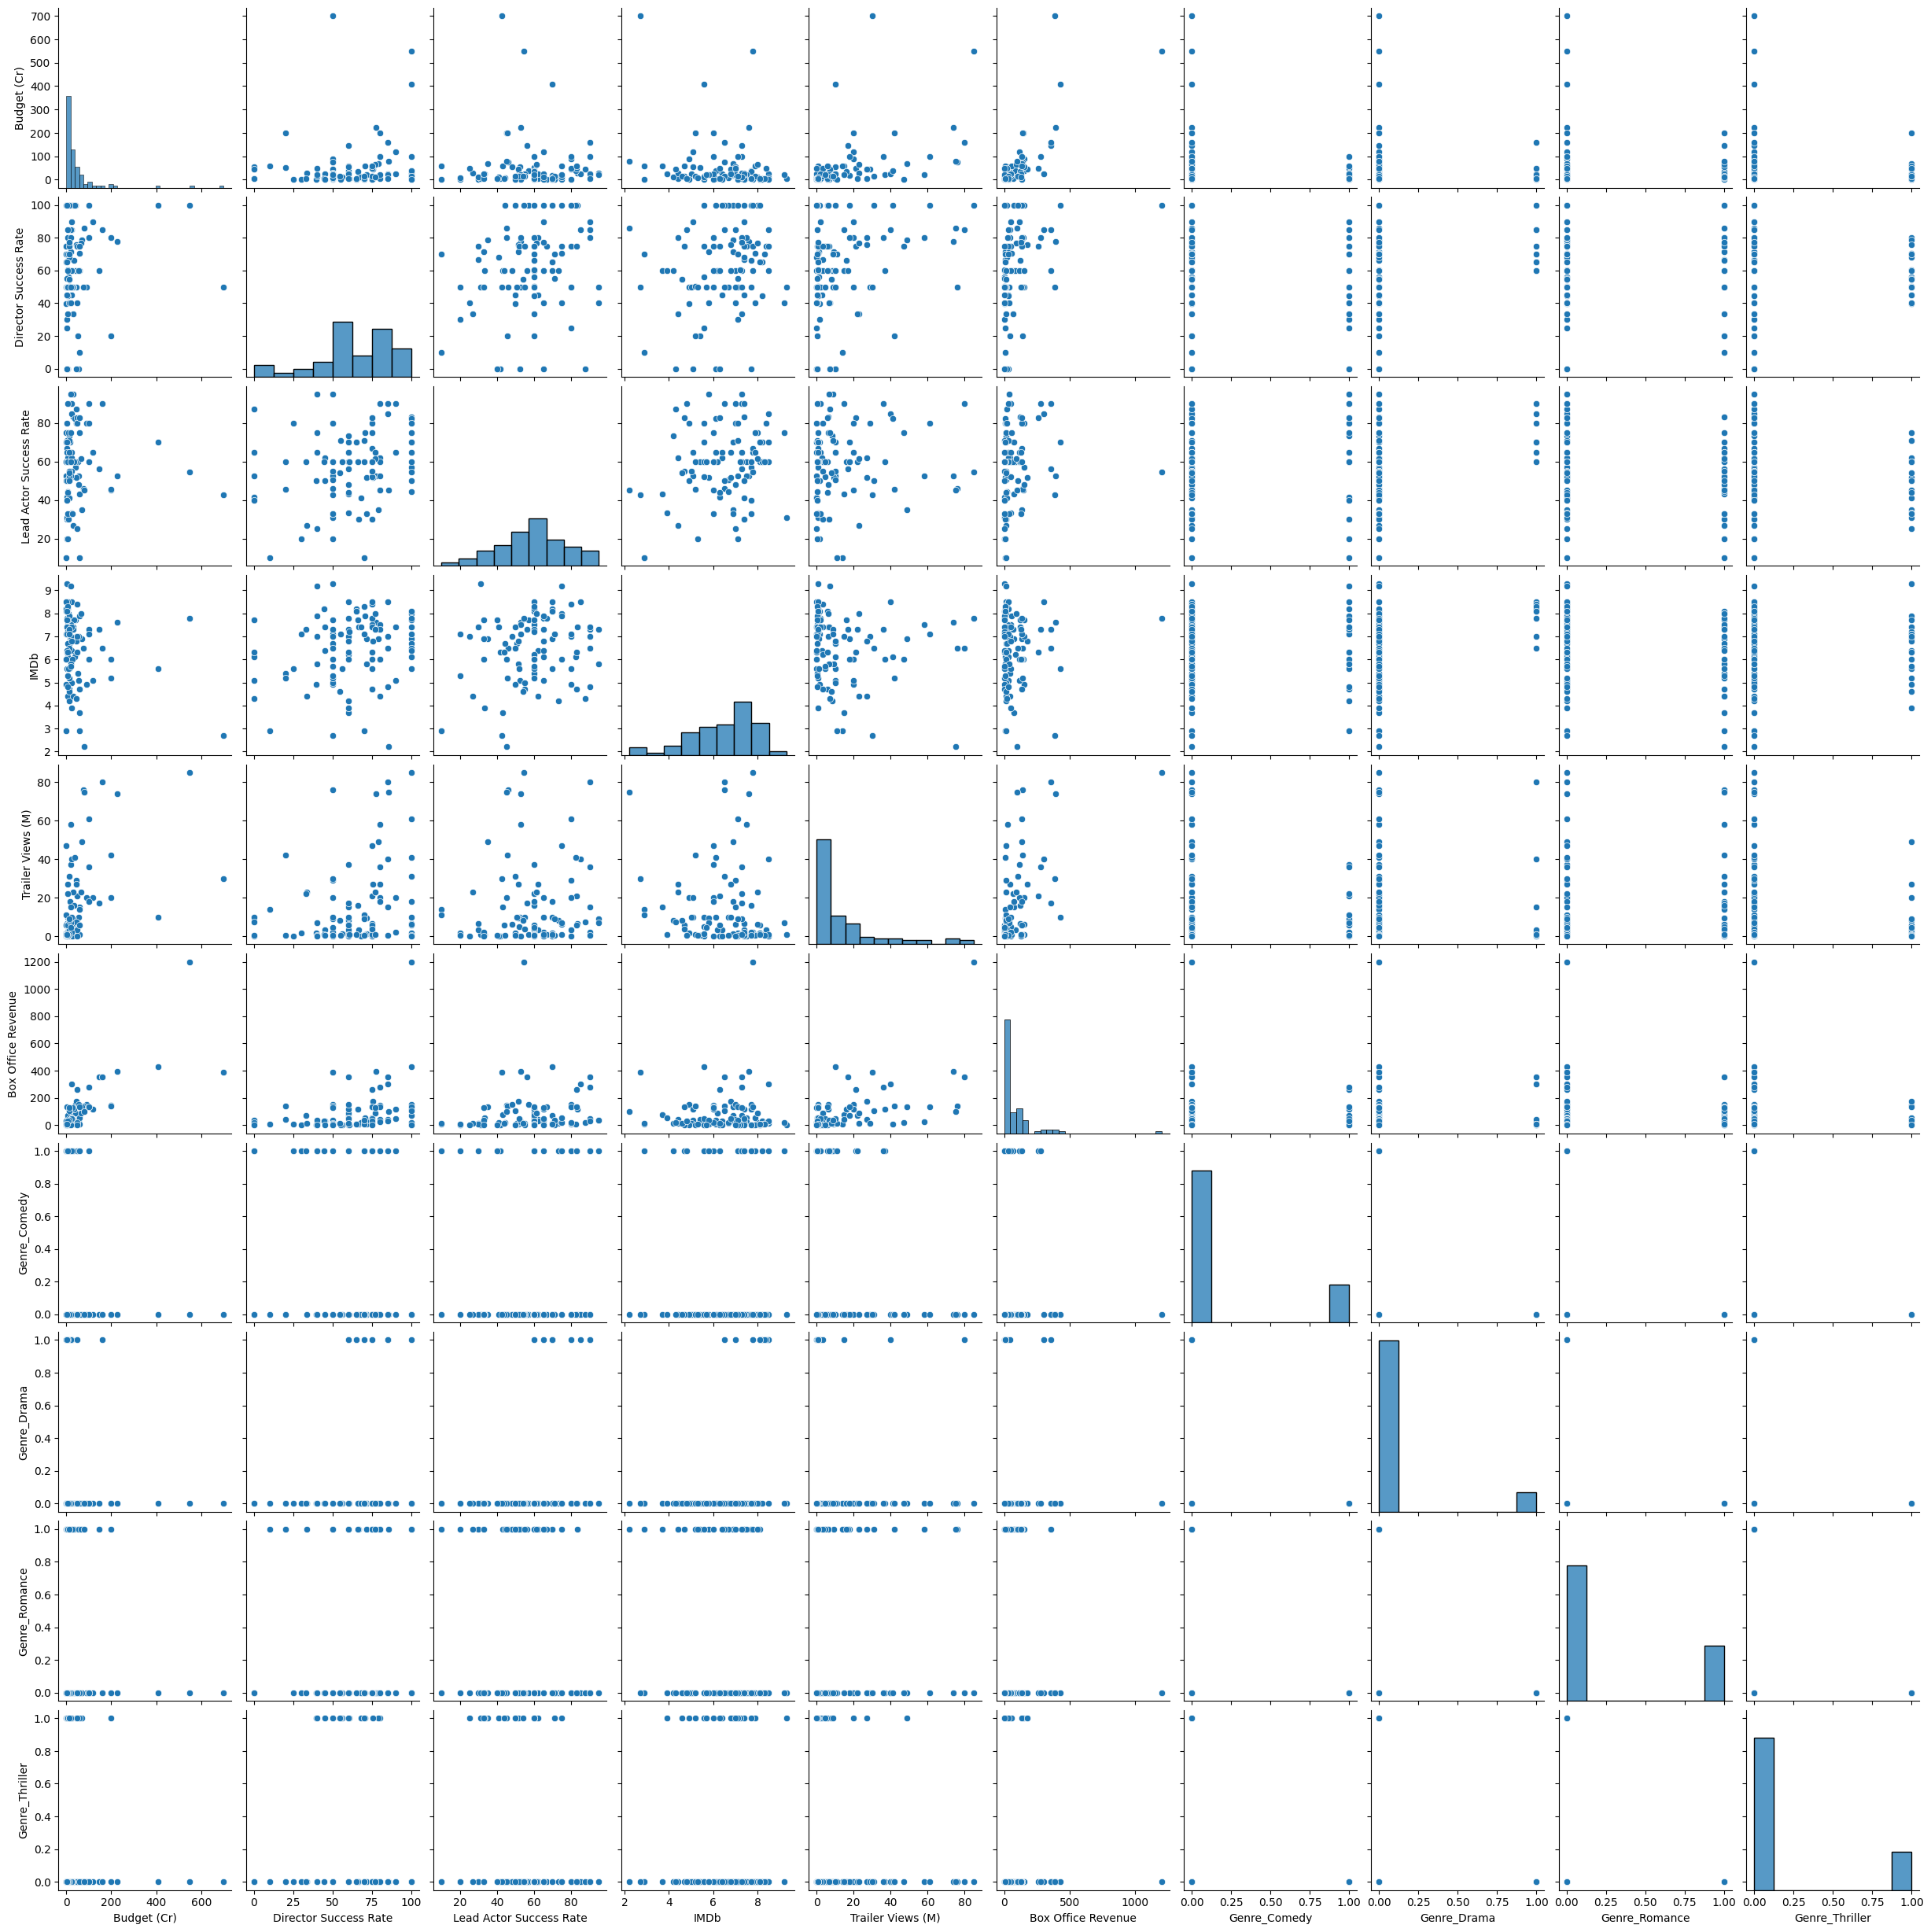

In [47]:

sns.pairplot(df_encoded.sample(100))
plt.show()

Splitting and Feature Scaling

In [48]:

scaler = StandardScaler()
num_cols = df_encoded.select_dtypes(include=['float64','int64']).columns
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])


X = df_encoded.drop('Box Office Revenue', axis=1)
y = df_encoded['Box Office Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Logistic Regression Model

In [49]:


lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression:")
print("R² Score:", lr.score(X_test, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))


Linear Regression:
R² Score: 0.38280868204061513
RMSE: 0.8940018912802355


Decision Tree Model

In [50]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Regressor:")
print("R² Score:", dt.score(X_test, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))


Decision Tree Regressor:
R² Score: -0.22273729424285538
RMSE: 1.2583316283094295


Random Forest Model

In [51]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Regressor:")
print("R² Score:", rf.score(X_test, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


Random Forest Regressor:
R² Score: 0.4384449213840963
RMSE: 0.8527558611920402


K-Nearest Neighnour

In [52]:

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("KNN Regressor:")
print("R² Score:", knn.score(X_test, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_knn)))


KNN Regressor:
R² Score: 0.36139328221092415
RMSE: 0.9093797409870635


#Hypertuning

1. GridSearchCV

GridSearchCV performs an exhaustive search over a grid of possible hyperparameter combinations. It tries every single combination of the specified parameters. After evaluating all combinations using cross-validation (CV), it selects the set of parameters that performs the best.

We use it:

 -> When the parameter grid is small.

 -> When time is not a constraint and you want to try all combinations for the best result.

In [53]:
from sklearn.model_selection import GridSearchCV


param_grid = {'n_estimators': [50, 100], 'max_depth': [None, 10, 20]}

grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=3,
    scoring='neg_mean_squared_error'
)

grid.fit(X_train, y_train)
best_rf = grid.best_estimator_
y_best = best_rf.predict(X_test)

rmse_best = np.sqrt(mean_squared_error(y_test, y_best))
r2_best = r2_score(y_test, y_best)

print("Best RF RMSE:", rmse_best)
print("Best RF R²:", r2_best)


Best RF RMSE: 0.8527558611920402
Best RF R²: 0.4384449213840963


In [54]:

df_encoded.to_csv('Cleaned_Movie_Data.csv', index=False)

Conclusion:-

- **Dataset Size after Cleaning**: rows and features as shown in the notebook.
- **Missing Values**: None after the cleaning steps.
- **Model Performance**:
  - Linear Regression, Decision Tree, Random Forest, and KNN were evaluated.
  - Random Forest (with tuning) achieved the best balance of RMSE and R².
- **Key Insights**:
  - Higher budgets, better IMDb ratings, and more trailer views generally lead to higher revenues.
  - Genre encodings reveal differences in expected revenue by category.
- **Limitations & Future Work**:
  - Include external factors like release date seasonality and marketing spend.